In [58]:
import h5py
import os
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np

In [100]:
#Open file

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename()

data = h5py.File(filename, 'r')

In [101]:
#what are the variables it contains?
list(data.keys())

['frame',
 'goal heading',
 'heading',
 'intx',
 'inty',
 'new goal heading',
 'open loop',
 'open loop value',
 'open loop value x',
 'open loop x',
 'output_voltage_x_gain',
 'panel heading',
 'panel jump',
 'panel x',
 'posx',
 'posy',
 'pulse_on',
 'time',
 'trial_counter',
 'velx',
 'vely']

In [102]:
#pull out the variables of interest

output_voltage = data['output_voltage_x_gain']
trial_counter = data['trial_counter']

#determine the moments of trip change as steps in the trial_counter
trip_change = np.ediff1d(trial_counter)

In [103]:
#Get the voltages where the change in trip ocurred

voltages = output_voltage[:-1]
voltages[trip_change>0.5,]

array([5.07507747, 0.21665071, 5.0699603 , 0.18582902, 5.06423527,
       0.2098466 , 5.09048066, 0.20707867, 5.0811424 , 0.17094997,
       5.05107603, 0.1789258 , 5.08644531, 0.26891357, 8.44784751,
       0.21228089, 4.96912057])

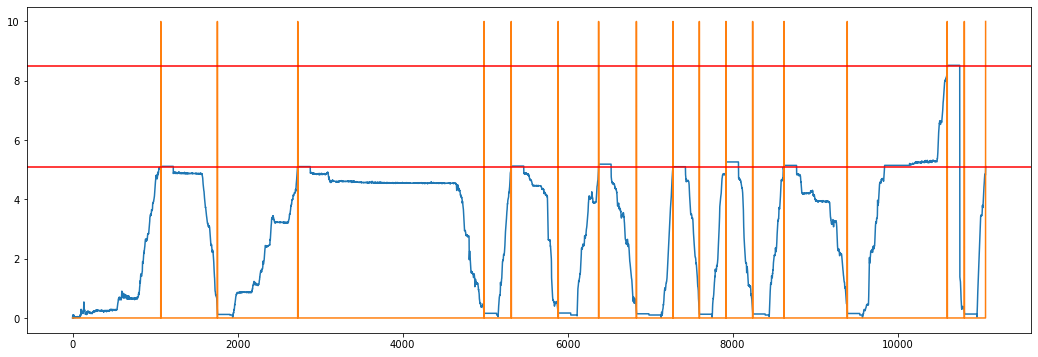

In [104]:
#Plot

plt.figure(figsize=(18, 6))
plt.plot(output_voltage)
plt.plot(trip_change*10)
plt.axhline(5.1,color = 'red')
plt.axhline(8.5,color = 'red')

In [106]:
#Make sure that the output voltage is being restricted

max(output_voltage)

8.520292017444463

In [107]:
open_loop_value = data['open loop value']
open_loop_value_x = data['open loop value x']

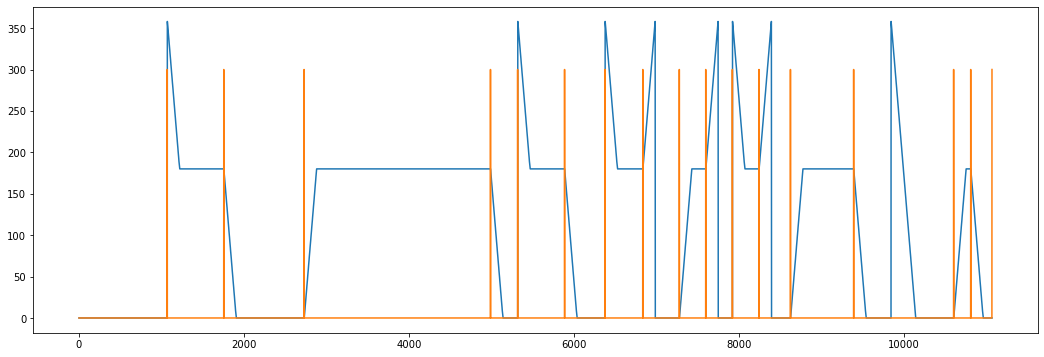

In [108]:
plt.figure(figsize=(18, 6))
plt.plot(open_loop_value)
plt.plot(trip_change*300)

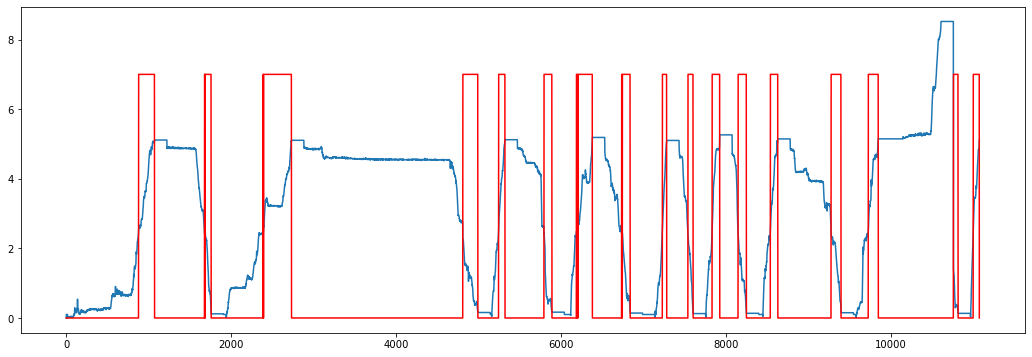

In [109]:
#Check that the rewards were delivered correctly

pulse_on = data['pulse_on']

plt.figure(figsize=(18, 6))
plt.plot(output_voltage)
plt.plot(pulse_on,'red')